### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
#load basic libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
# read in the data we want to review
data = pd.read_csv('coupons.csv')

In [5]:
#quick peak at whats in the data
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

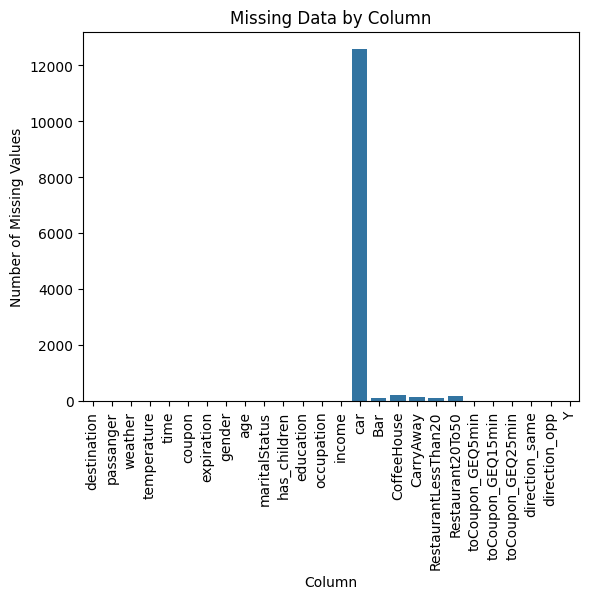

In [6]:
# Little more details at what the data is and lets figure out whats missing
data.head()
data.info()
data.describe()

missing_values_count = data.isnull().sum()

sns.barplot(x=missing_values_count.index, y=missing_values_count.values)
plt.xticks(rotation=90)
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Missing Data by Column')
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
#Car clearly has missing data, lets just drop
data.drop('car',axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

4. What proportion of the total observations chose to accept the coupon?



In [8]:
# Lets look at how many accepted coupon by percentage
data['Y'].value_counts(normalize=True)[1]*100

56.84326710816777

5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'Count')

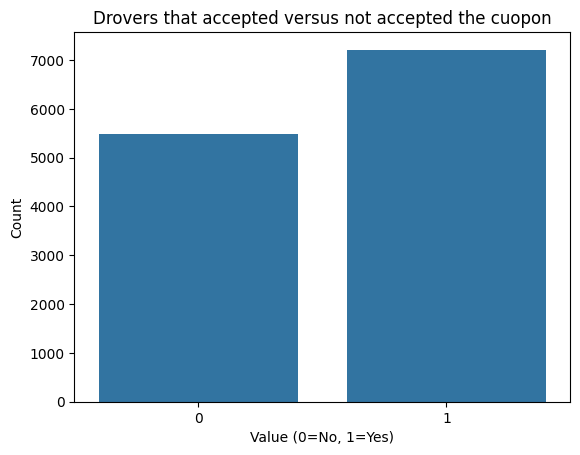

In [9]:
#Visualize accepted vs not
plt.figure()
sns.countplot(data,x='Y')

plt.title('Drovers that accepted versus not accepted the cuopon')
plt.xlabel('Value (0=No, 1=Yes)')
plt.ylabel('Count')

6. Use a histogram to visualize the temperature column.

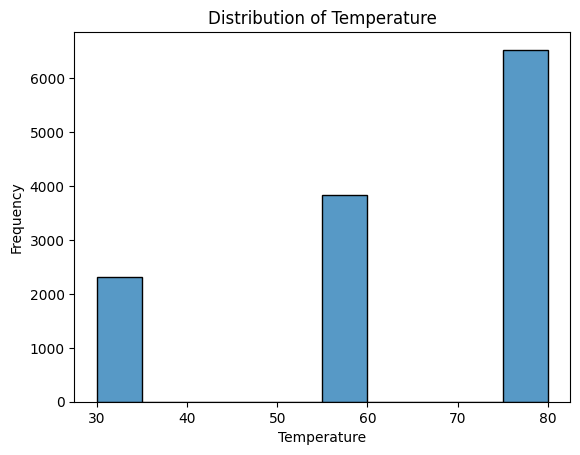

In [10]:
#Temperature
plt.figure()
sns.histplot(data['temperature'], kde=False, bins=10)

plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
# Dataframe for bar coupons
bar_coupons_df = data[data['coupon'] == 'Bar']
bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [13]:
# Proportion of bar coupons were accepted
bar_coupons_df['Y'].value_counts(normalize=True)
print(f'The proportion of bar coupons that were accepted is {bar_coupons_df["Y"].value_counts(normalize=True)[1]*100}%')

The proportion of bar coupons that were accepted is 41.00148735746158%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [14]:
frequency_3_or_less = ['less1', '1~3']
df_frequency_3_or_less = bar_coupons_df.copy()
df_frequency_3_or_less['bar_frequency'] = df_frequency_3_or_less['Bar'].apply(lambda x: '3 or Less' if x in (frequency_3_or_less) else 'More than 3')

# Count of values
print('Count of values')
print(df_frequency_3_or_less['bar_frequency'].value_counts())

# Proportion
print('\nProportion')
print(df_frequency_3_or_less['bar_frequency'].value_counts(normalize=True))

Count of values
bar_frequency
More than 3    1050
3 or Less       967
Name: count, dtype: int64

Proportion
bar_frequency
More than 3    0.520575
3 or Less      0.479425
Name: proportion, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [15]:
bar_coupons_df = data[data['coupon'] == 'Bar']

condition = (bar_coupons_df['Bar'].isin(['1~3', '4~8', '>8'])) & (bar_coupons_df['age'] > '25')

# Group 1: Drivers who go to a bar more than once a month and are over 25
group1_acceptance_rate = bar_coupons_df[condition]['Y'].mean() * 100

# Group 2: All other drivers
group2_acceptance_rate = bar_coupons_df[~condition]['Y'].mean() * 100

# Print the acceptance rates
print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {group1_acceptance_rate}%")
print(f"Acceptance rate for all other drivers: {group2_acceptance_rate}%")



Acceptance rate for drivers who go to a bar more than once a month and are over 25: 68.93939393939394%
Acceptance rate for all other drivers: 34.17643429981493%


Drivers who go to the bar more than once a month and are over 25 accept the coupon more.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [16]:
# Filter for bar-related coupons data
bar_coupons_df = data[data['coupon'] == 'Bar']

# Create a boolean condition:
# 1. Drivers who go to bars more than once a month ('1~3', '4~8', '>8')
# 2. Passengers not kids (i.e. excluding 'Kid(s)')
# 3. Occupation not in 'Farming, Fishing, or Forestry'
condition = (
    bar_coupons_df['Bar'].isin(['1~3', '4~8', '>8']) &
    (bar_coupons_df['passanger'] != 'Kid(s)') &
    (bar_coupons_df['occupation'] != 'Farming, Fishing, and Forestry')
)

# Group 1: Drivers who meet the three conditions
group1_acceptance_rate = bar_coupons_df[condition]['Y'].mean() * 100

# Group 2: All other drivers
group2_acceptance_rate = bar_coupons_df[~condition]['Y'].mean() * 100

# Print the acceptance rates
print(f"Acceptance rate for drivers who meet the three conditions: {group1_acceptance_rate}%")
print(f"Acceptance rate for all other drivers: {group2_acceptance_rate}%")


Acceptance rate for drivers who meet the three conditions: 71.17296222664015%
Acceptance rate for all other drivers: 30.9775429326288%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [20]:
# Define conditions for the three groups:

# 1. Go to bars more than once a month, passengers not a kid, and not widowed
condition1 = (
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', '>8'])) &
    (bar_coupons_df['passanger'] != 'Kid(s)') &
    (bar_coupons_df['maritalStatus'] != 'Widowed')
)

# 2. Go to bars more than once a month and are under the age of 30
condition2 = (
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', '>8'])) &
    (bar_coupons_df['age'] < '30')
)

# 3. Go to cheap restaurants more than 4 times a month and income is less than 50K
condition3 = (
    (bar_coupons_df['RestaurantLessThan20'].isin(['4~8', '>8'])) &
    (bar_coupons_df['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
)

# Combine all conditions using OR
combined_condition = condition1 | condition2 | condition3

# Group 1: Drivers who meet any of the conditions
group1_acceptance_rate = bar_coupons_df[combined_condition]['Y'].mean() * 100

# Group 2: All other drivers
group2_acceptance_rate = bar_coupons_df[~combined_condition]['Y'].mean() * 100

# Print the acceptance rates
print(f"Acceptance rate for drivers who meet any of the conditions: {group1_acceptance_rate}%")
print(f"Acceptance rate for all other drivers: {group2_acceptance_rate}%")



Acceptance rate for drivers who meet any of the conditions: 59.64391691394659%
Acceptance rate for all other drivers: 31.645569620253166%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#From the observations, we can infer that customers who visit bars frequently and don't have kids with them are much more likely to accept bar coupons.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


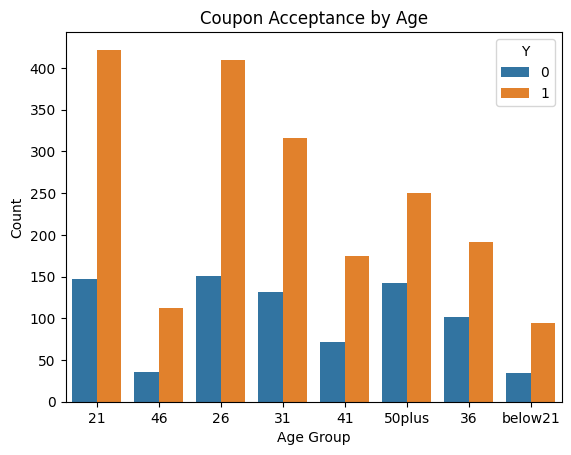

In [13]:
#Acceptance by age
restaurant_coupons_df = data[data['coupon'] == 'Restaurant(<20)']
sns.countplot(x='age', hue='Y', data=restaurant_coupons_df)
plt.title('Coupon Acceptance by Age')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


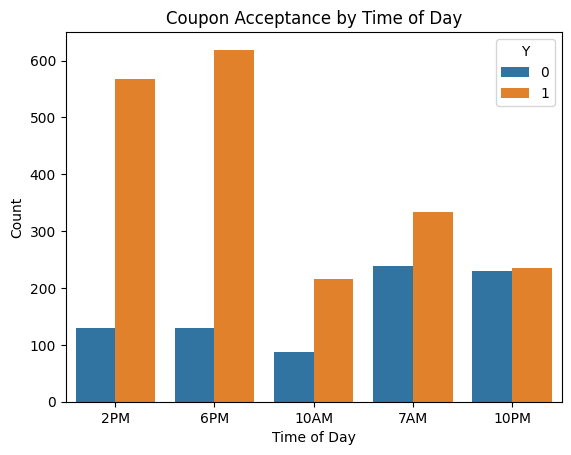

In [14]:
#Acceptance by time of day
sns.countplot(x='time', hue='Y', data=restaurant_coupons_df)
plt.title('Coupon Acceptance by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


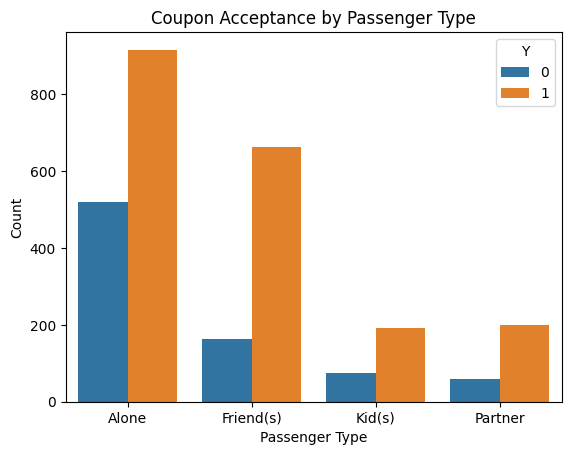

In [15]:
#Acceptance by passenger type
sns.countplot(x='passanger', hue='Y', data=restaurant_coupons_df)
plt.title('Coupon Acceptance by Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


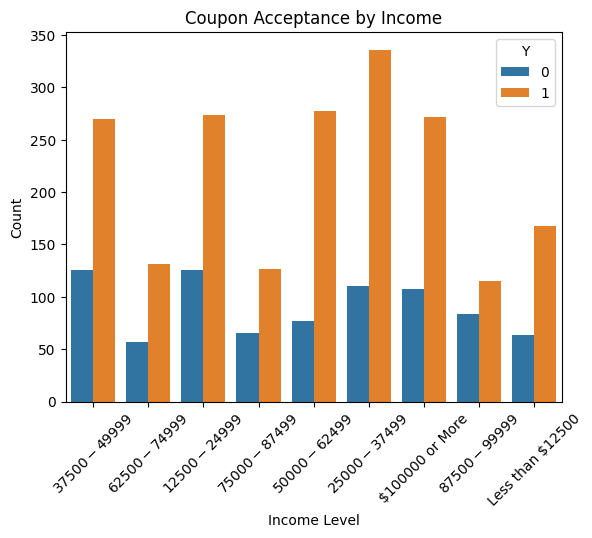

In [16]:
#Acceptance by income
sns.countplot(x='income', hue='Y', data=restaurant_coupons_df)
plt.title('Coupon Acceptance by Income')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()